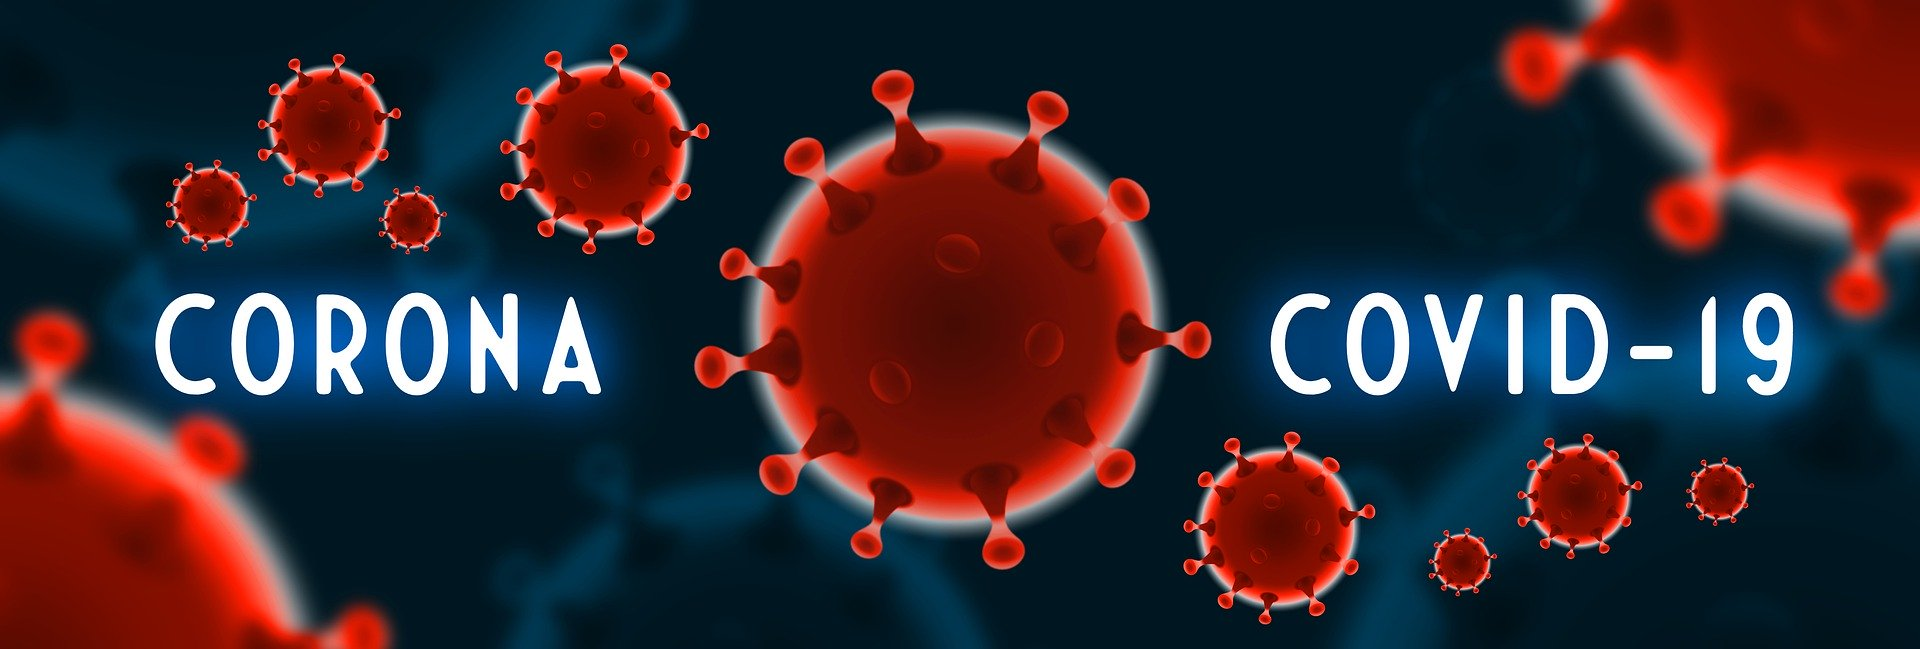

# Covid Introduction

Add some text here about importance of this

## Data Collection/Curation

In [35]:
import pandas as pd, matplotlib.pyplot as plt, numpy as np, re, datetime

The John's Hopkins curated dataset can be found [here](https://github.com/CSSEGISandData/COVID-19). For our analysis, we'll be using the time series csv file for confirmed cases and deaths.

In [37]:
confirmed_US = pd.read_csv("datasets/time_series_covid19_confirmed_US.csv")
deaths_US = pd.read_csv("datasets/time_series_covid19_deaths_US.csv")

confirmed_US

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/2/22,4/3/22,4/4/22,4/5/22,4/6/22,4/7/22,4/8/22,4/9/22,4/10/22,4/11/22
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,15659,15659,15689,15692,15724,15742,15744,15744,15744,15747
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,55420,55420,55431,55449,55456,55468,55489,55489,55489,55499
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,5656,5656,5656,5656,5657,5658,5658,5658,5658,5658
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,6417,6417,6419,6419,6420,6421,6422,6422,6422,6425
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,14901,14901,14902,14903,14905,14926,14929,14929,14929,14934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3337,84056039,US,USA,840,56039.0,Teton,Wyoming,US,43.935225,-110.589080,...,9918,9918,9918,9924,9924,9924,9932,9932,9932,9932
3338,84056041,US,USA,840,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,...,5638,5638,5638,5642,5642,5642,5634,5634,5634,5634
3339,84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
3340,84056043,US,USA,840,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,...,2353,2353,2353,2354,2354,2354,2358,2358,2358,2358


*Talk about handling missing values here*

In [41]:
# Checking for missing values
confirmed_US.isnull().sum()

UID         0
iso2        0
iso3        0
code3       0
FIPS       10
           ..
4/7/22      0
4/8/22      0
4/9/22      0
4/10/22     0
4/11/22     0
Length: 822, dtype: int64

*Talk about tidy data here...*

The dataset above has each date as an individual column thus making the table too "wide". This in turn makes it harder in analyzing the date (albeit it's easier to read). We'll convert the table from the current wide format to a long format by turning each date column into their own row through a process called melting. More information about melting can be found [here](https://dataindependent.com/pandas/pandas-melt-pd-melt/).

In [45]:
# finding index of first date
idx = next(x for x in confirmed_US.columns.values if (re.match('(\d{1,2})[/.-](\d{1,2})[/.-](\d{2})$', x)))
idx = np.where(confirmed_US.columns.values == idx)[0][0]

# melting our dataframe with our identifier variables being everything up to idx
confirmed_US = pd.melt(confirmed_US, id_vars=confirmed_US.columns[0:idx])
confirmed_US.rename(columns={"value": "Cases", "variable": "Date"}, inplace=True)
confirmed_US

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Cases
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",1/22/20,0
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",1/22/20,0
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US",1/22/20,0
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US",1/22/20,0
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,"Blount, Alabama, US",1/22/20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2710357,84056039,US,USA,840,56039.0,Teton,Wyoming,US,43.935225,-110.589080,"Teton, Wyoming, US",4/11/22,9932
2710358,84056041,US,USA,840,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,"Uinta, Wyoming, US",4/11/22,5634
2710359,84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.000000,0.000000,"Unassigned, Wyoming, US",4/11/22,0
2710360,84056043,US,USA,840,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,"Washakie, Wyoming, US",4/11/22,2358


Here we see that our number of columns have been reduced from 822 to just 13! Although our number of rows did increase by the respective amount that the columns decreased, this is fine as we want each observation (dates in our case) to be in its own row.

In addition to melting our data, our next step would be to convert each of the dates inside our dataframe to [datetime](https://docs.python.org/3/library/datetime.html) objects. These are objects supplied by the datetime module that allows us to easily perform comparison operations and range queries on ates which will be needed later on. To make things easier, pandas has a method called ```to_datetime()``` that allows us to streamline this process.

In [46]:
confirmed_US['Date'] = pd.to_datetime(confirmed_US['Date'], format="%m/%d/%y")
confirmed_US

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Cases
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",2020-01-22,0
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",2020-01-22,0
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US",2020-01-22,0
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US",2020-01-22,0
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,"Blount, Alabama, US",2020-01-22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2710357,84056039,US,USA,840,56039.0,Teton,Wyoming,US,43.935225,-110.589080,"Teton, Wyoming, US",2022-04-11,9932
2710358,84056041,US,USA,840,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,"Uinta, Wyoming, US",2022-04-11,5634
2710359,84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.000000,0.000000,"Unassigned, Wyoming, US",2022-04-11,0
2710360,84056043,US,USA,840,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,"Washakie, Wyoming, US",2022-04-11,2358


In [47]:
filtered = df.loc[df["Province_State"] == "Maryland"]["4/2/21"]
sum(filtered)

sum(df2.loc[(df2["Province_State"] == "Maryland") & (df2["variable"] =="4/2/21")]["value"])

NameError: name 'df' is not defined

## Data management/representation

## Exploratory data analysis

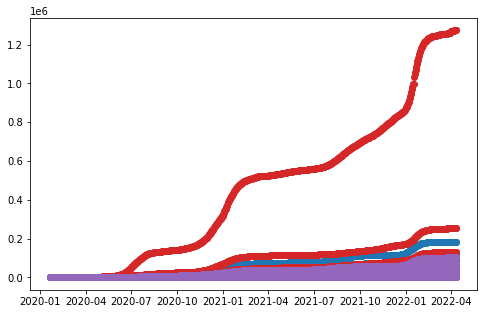

In [59]:
fig, ax = plt.subplots(figsize=(8,5))

# sum up all cases from each p

states = np.unique(confirmed_US['Province_State'].values)[0:5]

#ax.plot(confirmed_US['Date'], confirmed_US['Cases'] )
for s in states:
    state_filter = confirmed_US.loc[confirmed_US['Province_State'] == s]
    ax.scatter(state_filter['Date'], state_filter['Cases'])

## Hypothesis Testing

## Communication of Insights